# Analysing employee exit surveys

This project uses exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The DETE exit survey data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available and the data that we'll be using has had some modifications to to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

We'll be trying to answer 2 questions using the data from both surveys:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To start with, we'll read in both datasets and explore them.

In [2]:
import pandas as pd
import numpy as np

In [3]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey['NESB'].value_counts()

Yes    32
Name: NESB, dtype: int64

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey['Contributing Factors. Career Move - Public Sector '].value_counts()


-                              375
Career Move - Public Sector     62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64

We can see that the DETE survey has 822 entries while the TAFE survey has 702 entries. Both datasets have many possible reasons for which employees leave, probably based on questions in the survey. 

The titles of each column in the TAFE survey are much longer, recording full questions. This makes it easy to determine what the data in each column means, but the headers will need to be shortened to make working with the dataset easier. The TAFE survey data also has many more null values in most of the columns.

On the other hand, it is more difficult to determine what the data in certain columns in the DETE dataset refer to without a data dictionary e.g. 'My say', 'Torres Island' and 'NESB'. We will probably drop these columns for the analysis. The DETE dataset also contains 'Not Stated' values rather than NaN for values that are missing.

## Cleaning the data

In [10]:
# Replacing 'Not Stated' values with NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
# Dropping unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
dete_survey_updated

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [11]:
# Dropping unnecessary columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
tafe_survey_updated

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


To make it easier to handle null values in the DETE dataset, we replaced the 'Not Stated' values with NaN values. We also removed multiple columns from both datasets that indicate an employee resigned because they were dissatisfied. Now we'll adjust the column names to make them easier to work with and give the same column names columns in both datasets containing the same information.

In [12]:
# re-formatting column names in the DETE dataset
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace(' ', '').str.lower()
dete_survey_updated.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [13]:
# Renaming some of the TAFE columns
column_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=column_names)
tafe_survey_updated.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [14]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Now let's focus specifically on entries for resignations, as we want to know whether employees are resigning due to some kind of dissatisfaction. For the DETE data, we'll have to make sure to include all 3 different kinds of resignation.

In [16]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']


In [17]:
dete_copy = dete_survey_updated.copy()
dete_resignations = dete_copy[dete_copy['separationtype'].isin(['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate'])]
dete_resignations
                              

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


## Verifying the data

To ensure that the data doesn't contain any logical inconsistencies, we'll examine the cease date columns to ensure that the years are within a reasonable range e.g. 1940 to the present (1940 because most people in this field start working in their 20s)

In [18]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [19]:
dete_resignations['cease_year'] = dete_resignations['cease_date'].str[-4:]
dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)
dete_resignations['cease_year'].value_counts()

<ipython-input-19-d083148826b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['cease_year'] = dete_resignations['cease_date'].str[-4:]
<ipython-input-19-d083148826b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_year, dtype: int64

In [20]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [21]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

There don't seem to be any major issues with the years in either dataset. The resignations in both datasets took place over similar periods of time -  2006 to 2014 for DETE and 2009 and 2013 for TAFE. Most of the resignations at DETE took place between 2012-2013, while most took place between 2011-2012 at TAFE. To ensure that we are able to do analysis over similar years, we'll drop any rows before 2010 and after 2013. As this constitutes a small number of resignations in both datasets, it should not affect the results of the analysis.

In [22]:
dete_resignations = dete_resignations[dete_resignations['cease_year'].isin([2010,2011,2012,2013])]
tafe_resignations = tafe_resignations[tafe_resignations['cease_date'].isin([2010,2011,2012,2013])]


## Calculating years in service of employees

As we are interested in reasons for resignation for employees who have worked at the institutions for different amounts of time, we will need to calculate the years of service for DETE employees. This is already available in the TAFE dataset.

In [23]:
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'] = dete_resignations['institute_service'].fillna(0)
# dete_resignations['institute_service'] = dete_resignations['institute_service'].astype(int)
dete_resignations.astype({'institute_service': 'float'}).dtypes
# dete_resignations['institute_service'].value_counts().sort_index(ascending=True)


<ipython-input-23-6163cf33eb8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']
<ipython-input-23-6163cf33eb8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['institute_service'] = dete_resignations['institute_service'].fillna(0)


id                                       int64
separationtype                          object
cease_date                              object
dete_start_date                        float64
role_start_date                        float64
position                                object
classification                          object
region                                  object
business_unit                           object
employment_status                       object
career_move_to_public_sector              bool
career_move_to_private_sector             bool
interpersonal_conflicts                   bool
job_dissatisfaction                       bool
dissatisfaction_with_the_department       bool
physical_work_environment                 bool
lack_of_recognition                       bool
lack_of_job_security                      bool
work_location                             bool
employment_conditions                     bool
maternity/family                          bool
relocation   

In [24]:
tafe_resignations['institute_service'].value_counts().sort_index(ascending=True)

1-2                   64
11-20                 24
3-4                   61
5-6                   33
7-10                  21
Less than 1 year      73
More than 20 years    10
Name: institute_service, dtype: int64

Lengths of service in DETE range from 0 to 49 years, while lengths of service in TAFE range from less than 1 year to more than 20 years. As the lengths of service in DETE are in years, while those in TAFE are in ranges of years, we need to align the formats to combine the datasets later on.

In [25]:
dete_resignations['institute_service'] = pd.cut(dete_resignations.institute_service, bins=[0,1,3,5,7,11,21,100], labels=['Less than 1 year','1-2','3-4','5-6','7-10','11-20','More than 20 years'])
dete_resignations['institute_service'].value_counts()


<ipython-input-25-f5b0d41882ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['institute_service'] = pd.cut(dete_resignations.institute_service, bins=[0,1,3,5,7,11,21,100], labels=['Less than 1 year','1-2','3-4','5-6','7-10','11-20','More than 20 years'])


11-20                 52
3-4                   36
More than 20 years    35
1-2                   31
7-10                  29
5-6                   26
Less than 1 year      22
Name: institute_service, dtype: int64

## Classifying dissastisfied employees

Now that we've cleaned up the data about lengths of service, we'll move on to classifying why employees resign, focusing specifically on dissatisfaction.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

dete_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [26]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()


-                                         273
Contributing Factors. Dissatisfaction      53
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()


-                      264
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [49]:
# creating a function to update the values in the tafe dissatisfaction / job dissatisfaction columns to True, False or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)


False    237
True      89
NaN        7
Name: dissatisfied, dtype: int64

In [54]:
# Creating dissatisfied column in dete dataset
# There is no need to apply the update_vals function as the values in the columns we are interested in are already boolean values
dete_columns = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']
dete_resignations['dissatisfied'] = dete_resignations[dete_columns].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)


<ipython-input-54-454a2f1b84a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dete_resignations['dissatisfied'] = dete_resignations[dete_columns].any(1, skipna=False)


False    140
True     137
Name: dissatisfied, dtype: int64

We've combined various columns in both datasets that could indicate employee dissatisfaction into one column in both datasets. The values in this column are as follows:

- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

Based on an overview of the columns, we can see that about half of DETE employees resigned due to dissatisfaction of some form, while only about a quarter of TAFE employees resigned due to dissatisfaction.

## Combining the two datasets

In [ ]:
# Adding a column to both datasets indicating the institute that the employees resigned from
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [60]:
# Combining both dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()


torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           28
classification                                         139
region                                                 231
role_start_date                                        241
dete_start_date                                        250
employment_conditions                                  277
work_life_balance                                      277
traumatic_incident                                     277
ill_health                                             277
study/travel                                           277
relocation                                             277
maternity/family                                       2

As we can see from the number of non-null values in each column, the columns that we need for our analysis all have <500 values, so we will drop all the columns with <500 non-null values.

In [61]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,5-6,False,DETE
1,6.000000e+00,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,11-20,True,DETE
2,9.000000e+00,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,1-2,False,DETE
3,1.000000e+01,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,11-20,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,1-2,False,DETE
...,...,...,...,...,...,...,...,...,...,...
605,6.350660e+17,Resignation,2013,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
606,6.350668e+17,Resignation,2013,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
607,6.350677e+17,Resignation,2013,NaN,NaN,NaN,NaN,NaN,False,TAFE
608,6.350704e+17,Resignation,2013,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


## Classifying years of service according to career stages

As employees have different years of service, we need to classify the different employees into groups to see how the years in service affects whether they resign due to dissastisfaction. We will use the career stages defined in this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage):
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [64]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

3-4                   97
Less than 1 year      95
1-2                   95
NaN                   93
11-20                 76
5-6                   59
7-10                  50
More than 20 years    45
Name: institute_service, dtype: int64

In [67]:
# Convert years of service to categories
def transform_service(val):
    if val == 'Less than 1 year':
        return "New"
    elif val == '1-2':
        return "New"
    elif val == '3-4':
        return "Experienced"
    elif val == '5-6':
        return "Experienced"
    elif val == '7-10':
        return "Established"
    elif val == '11-20':
        return "Veteran"
    elif val == 'More than 20 years':
        return "Veteran"
    elif pd.isnull(val):
        return np.nan

combined_updated['service_cat'] = combined_updated['institute_service'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()


<ipython-input-67-9badfb1e25de>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service'].apply(transform_service)


New            190
Experienced    156
Veteran        121
Established     50
Name: service_cat, dtype: int64

## Doing some initial analysis

In [68]:
# Check the unique values in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    377
True     226
NaN        7
Name: dissatisfied, dtype: int64

We'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

In [69]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

<ipython-input-69-0dc043a277ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


Since a True value is considered to be 1, calculating the mean using the pivot table function will also calculate the percentage of dissatisfied employees.

In [72]:
percentage_dissatisfied = pd.pivot_table(combined_updated, values='dissatisfied', index=['service_cat'])
percentage_dissatisfied


,dissatisfied
service_cat,
Established,0.500000
Experienced,0.358974
New,0.284211
Veteran,0.487603


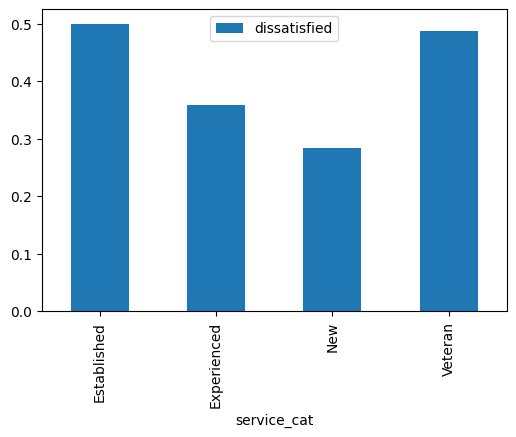

In [76]:
%matplotlib inline
percentage_dissatisfied.plot(kind='bar')

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

Possible next steps:
- Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
- Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?